In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

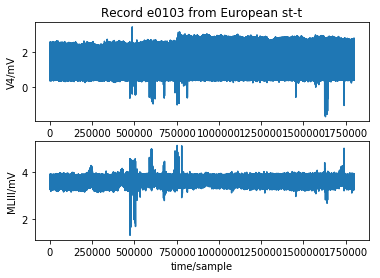

{'record_name': 'e0103',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1800000,
 'base_time': None,
 'base_date': None,
 'comments': ['Age: 62  Sex: M',
  'Mixed angina',
  '1-vessel disease (RCA)',
  'Medications: nitrates, diltiazem',
  'Recorder type: ICR 7200'],
 'sig_name': ['V4', 'MLIII'],
 'p_signal': array([[0.455, 3.755],
        [0.46 , 3.78 ],
        [0.45 , 3.765],
        ...,
        [0.535, 3.91 ],
        [0.54 , 3.87 ],
        [0.53 , 3.865]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['e0103.dat', 'e0103.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [91, 751],
 'checksum': [56457, 48959],
 'block_size': [0, 0]}

In [2]:
record = wfdb.rdrecord('european-st-t-database/e0103') 
wfdb.plot_wfdb(record=record, title='Record e0103 from European st-t') 
display(record.__dict__)

In [3]:
print(record.p_signal[:250])

[[0.455 3.755]
 [0.46  3.78 ]
 [0.45  3.765]
 [0.425 3.76 ]
 [0.435 3.76 ]
 [0.455 3.74 ]
 [0.49  3.78 ]
 [0.5   3.79 ]
 [0.485 3.79 ]
 [0.5   3.81 ]
 [0.495 3.83 ]
 [0.5   3.8  ]
 [0.5   3.81 ]
 [0.515 3.82 ]
 [0.53  3.815]
 [0.56  3.82 ]
 [0.57  3.82 ]
 [0.56  3.81 ]
 [0.535 3.78 ]
 [0.535 3.78 ]
 [0.535 3.78 ]
 [0.525 3.79 ]
 [0.51  3.79 ]
 [0.5   3.795]
 [0.5   3.78 ]
 [0.49  3.78 ]
 [0.485 3.775]
 [0.465 3.765]
 [0.46  3.765]
 [0.45  3.755]
 [0.445 3.755]
 [0.44  3.755]
 [0.435 3.755]
 [0.44  3.74 ]
 [0.445 3.745]
 [0.475 3.74 ]
 [0.495 3.74 ]
 [0.5   3.755]
 [0.5   3.76 ]
 [0.48  3.765]
 [0.45  3.76 ]
 [0.43  3.79 ]
 [0.43  3.81 ]
 [0.445 3.8  ]
 [0.495 3.775]
 [0.63  3.685]
 [0.88  3.56 ]
 [1.29  3.41 ]
 [1.77  3.34 ]
 [2.19  3.31 ]
 [2.415 3.345]
 [2.32  3.375]
 [1.985 3.345]
 [1.535 3.355]
 [1.085 3.415]
 [0.75  3.52 ]
 [0.58  3.595]
 [0.52  3.645]
 [0.525 3.69 ]
 [0.525 3.72 ]
 [0.515 3.725]
 [0.49  3.725]
 [0.475 3.74 ]
 [0.465 3.755]
 [0.45  3.755]
 [0.455 3.755]
 [0.455 3.

In [6]:
import numpy as np
arr1=np.array(record.p_signal[:])
x, y = arr1.T
np.where(x == max(x))[0][0]
max(x)

3.39

In [ ]:

from matplotlib import pyplot as plt

data = np.array(record.p_signal[208:416])
x, y = data.T
print(x)
ts=np.array([x+1 for x in range(208)])
plt.scatter(ts,x)
plt.show()

In [ ]:
import math
r_point_y=max(x)
point=np.where(x == max(x))[0][0]
r_point_x=ts[point]
# next we find the slope made by the line connecting to the s point
for j in range(point,150):
    if x[j]<x[j+1]:
        break
for k in range(point,0,-1):
    if x[k-1]>x[k]:
        break
q_point_y=x[k]
q_point_x=ts[k]
s_point_y=x[j]
s_point_x=ts[j]
print(q_point_x,q_point_y,r_point_x,r_point_y,s_point_x,s_point_y)
rs_slope=((s_point_y-r_point_y)/(s_point_x-r_point_x))
qr_slope=((r_point_y-q_point_y)/(r_point_x-q_point_x))
print("QR slope:",qr_slope,", RS slope:",rs_slope)
print(" now finding angl made by the lines on the top")
print("QR angle:",math.degrees(math.atan(qr_slope)),"RS angle:",math.degrees(math.atan(rs_slope)))

Now we run this slope finder on all 250Hz samples

In [ ]:
qr_slope_list=[]
rs_slope_list=[]
for freq in range(0,1800000,208):
    print(freq)
    data = np.array(record.p_signal[freq:freq+208])
    x, y = data.T
    #print(x)
    ts=np.array([x+1 for x in range(208)])
    r_point_y=max(x)
    point=np.where(x == max(x))[0][0]
    r_point_x=ts[point]
    # next we find the slope made by the line connecting to the s point
    for j in range(point,208-1):
        if x[j]<x[j+1]:
            break
    for k in range(point,0,-1):
        if x[k-1]>x[k]:
            break
    q_point_y=x[k]
    q_point_x=ts[k]
    s_point_y=x[j]
    s_point_x=ts[j]
    #print(q_point_x,q_point_y,r_point_x,r_point_y,s_point_x,s_point_y)
    rs_slope=((s_point_y-r_point_y)/(s_point_x-r_point_x))
    qr_slope=((r_point_y-q_point_y)/(r_point_x-q_point_x))
    #print("QR slope:",qr_slope,", RS slope:",rs_slope)
    
    qr_slope_list+=[qr_slope]
    rs_slope_list+=[rs_slope]
print(" average QR slope= ", np.nanmean((np.array(qr_slope_list))))
print(" average RS slope= ", np.nanmean((np.array(rs_slope_list))))
print(" average QR slope= ", np.nanstd((np.array(qr_slope_list))))
print(" average RS slope= ", np.nanstd((np.array(rs_slope_list))))

In [ ]:
print(" now finding angle made by the lines on the top")
print("QR angle:",math.degrees(math.atan(np.nanmean((np.array(qr_slope_list))))),"RS angle:",math.degrees(math.atan(abs(np.nanmean((np.array(rs_slope_list)))))))

In [ ]:
plt.scatter(ts,y)
plt.show()